# Notebook to Compress CSVs

## MDX5CV - Compress CSVs

We will just compress the CSVs but only with general contact behaviour, is in orther to test a model.

In [24]:
import utils as ut
import os
import pandas as pd
import numpy as np

In [ ]:
path_to_csv = r'C:\Users\Usuario\Documents\Documents\MVA\Stage\DLCProject\Data\MDX5CV BEHAVIOUR\Alive male\Général\csv General files'

csv_files = [f for f in os.listdir(path_to_csv) if f.endswith('.csv')]

path_to_vid = r'C:\Users\Usuario\Documents\Documents\MVA\Stage\DLCProject\Data\AnalyzedVideos\MDX5CV male videos'

path_to_save_csv = r'C:\Users\Usuario\Documents\Documents\MVA\Stage\DLCProject\Data\DataLoaderTestFormatMDX5CV'

for file in csv_files:
    print(f"Reading file: {file}")
    test_name = file.split('_')[3] + ' ' + file.split('_')[4][:-4]
    # Video path has the same name somewhere
    video_name = [f for f in os.listdir(path_to_vid) if test_name in f][0]
    video_path = os.path.join(path_to_vid, video_name)
    # Create dataframe with each row as a frame
    num_frames, fps = ut.get_video_info(video_path)
    compress_df = pd.DataFrame()
    compress_df['Frame'] = np.arange(num_frames, dtype=int)
    df = pd.read_csv(os.path.join(path_to_csv, file))
    for col in df.columns[1:]:
        compress_df[col] = np.zeros(num_frames)
        for i in range(len(df)):
            starting_frame = ut.from_time_to_frame_s(df['Time (s)'][i], fps)
            if i == len(df) - 1:
                ending_frame = num_frames
            else:
                ending_frame = ut.from_time_to_frame_s(df['Time (s)'][i+1], fps)
            compress_df[col][starting_frame:ending_frame] = df[col][i]
    
    compress_df.to_csv(os.path.join(path_to_save_csv, video_name[:-4] + '.csv'), index=False)
   

### Change names of files

In [ ]:
import os

In [ ]:
# For all files in a folder that contains ' ' (spaces) replace them by '_'.

path = r'C:\Users\Usuario\Documents\Documents\MVA\Stage\DLCProject\Data\AnalyzedVideos\MDX5CV male videos'

for file in os.listdir(path):
    if ' ' in file:
        os.rename(os.path.join(path, file), os.path.join(path, file.replace(' ', '_')))



In [ ]:

print(data) for df in df_list:
            # We need to see if in each frame, each behaviour is present or not
            for behaviour in df.columns[1:]:
                compress_df[behaviour] = np.zeros(num_frames)
                # Get instances of the behaviour
                for i in range(len(df)):

                    starting_frame = from_time_to_frame(df['Time'][i], fps)
                    if i == len(df) - 1:
                        ending_frame = num_frames
                    else:
                        ending_frame = from_time_to_frame(df['Time'][i+1], fps)
                    compress_df[behaviour][starting_frame:ending_frame] = df[behaviour][i]


# Videos lindos

In [4]:
import DataDLC
import importlib

In [5]:
importlib.reload(DataDLC)

<module 'DataDLC' from 'c:\\Users\\jalvarez\\Documents\\Code\\GitHubCOde\\Behavioral_Tagging_of_Mice_in_multiple_Mice_dataset_using_Deep_Learning\\src\\DataDLC.py'>

In [9]:
data_dlc = DataDLC.DataDLC(r'c:\Users\jalvarez\Documents\Data\DLC_analyzedvid\MDX5CV_wo_tail\MDX5CV female\MDXCV_fem_Test_27DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5')


c:\Users\jalvarez\Documents\Code\GitHubCOde\Behavioral_Tagging_of_Mice_in_multiple_Mice_dataset_using_Deep_Learning\src\DataDLC.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind.loc[:, ('Center of mass', 'x')] = x_mean
c:\Users\jalvarez\Documents\Code\GitHubCOde\Behavioral_Tagging_of_Mice_in_multiple_Mice_dataset_using_Deep_Learning\src\DataDLC.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind.loc[:, ('Center of mass', 'y')] = y_mean
c:\Users\jalvarez\Documents\Code\GitHubCOde\Behavioral_Taggi

In [ ]:
skeleton = ['Nose', 'Right_ear', 'Spine_1', 'Right_fhip', 'Right_mid', 'Right_bhip', 
            'Tail_base', 'Left_bhip', 'Left_mid', 'Left_fhip', 'Spine_1', 'Left_ear', 'Nose', 'Nose']
tail_skeleton = ['Tail_base', 'Tail_1', 'Tail_2', 'Tail_3', 'Tail_4', 'Tail_tip', 'Tail_tip']

In [ ]:
# Create a video with only the body parts. All frames will be a white background with the body parts

import cv2
import numpy as np
import tqdm

# Get the body parts
coords = data_dlc.coords

# Create the video
fps = 15
width = 640
height = 480
fourcc = cv2.VideoWriter_fourcc(*'XVID')

out = cv2.VideoWriter(r'c:\Users\jalvarez\Documents\VideoLindo.avi', fourcc, fps, (width, height))

for f in tqdm.tqdm(range(data_dlc.n_frames)):
    frame = np.zeros((height, width, 3), dtype=np.uint8)
    for j, ind in enumerate(data_dlc.individuals):
        for i, bp in enumerate(data_dlc.body_parts):
            if coords[ind].loc[i, (bp, 'likelihood')] > 0.7:
                x = coords[ind].loc[f, (bp, 'x')]
                y = coords[ind].loc[f, (bp, 'y')]
                if j == 0:
                    color = (255, 0, 0)
                else:
                    color = (0, 0, 255)
                cv2.circle(frame, (int(x), int(y)), 5, color, -1)
    # Build the skeleton
    for ind in data_dlc.individuals:
        for i in range(len(skeleton) - 1):
            if coords[ind].loc[f, (skeleton[i], 'likelihood')] > 0.7 and coords[ind].loc[f, (skeleton[i+1], 'likelihood')] > 0.7:
                x1 = coords[ind].loc[f, (skeleton[i], 'x')]
                y1 = coords[ind].loc[f, (skeleton[i], 'y')]
                x2 = coords[ind].loc[f, (skeleton[i+1], 'x')]
                y2 = coords[ind].loc[f, (skeleton[i+1], 'y')]
                cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (255, 255, 255), 2)
    # Build the tail
    for ind in data_dlc.individuals:
        for i in range(len(tail_skeleton) - 1):
            if coords[ind].loc[f, (tail_skeleton[i], 'likelihood')] > 0.7 and coords[ind].loc[f, (tail_skeleton[i+1], 'likelihood')] > 0.7:
                x1 = coords[ind].loc[f, (tail_skeleton[i], 'x')]
                y1 = coords[ind].loc[f, (tail_skeleton[i], 'y')]
                x2 = coords[ind].loc[f, (tail_skeleton[i+1], 'x')]
                y2 = coords[ind].loc[f, (tail_skeleton[i+1], 'y')]
                cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (255, 255, 255), 2) 
    out.write(frame)

out.release()
cv2.destroyAllWindows()


---
---

# graph is not working, let's see why

In [2]:
import dataloader
import importlib

In [101]:
importlib.reload(dataloader)

<module 'dataloader' from 'c:\\Users\\jalvarez\\Documents\\Code\\GitHubCOde\\Behavioral_Tagging_of_Mice_in_multiple_Mice_dataset_using_Deep_Learning\\src\\dataloader.py'>

In [102]:
# Load data

data = dataloader.DLCDataLoader(r'c:\Users\jalvarez\Documents\Data\DataLoader_Baseline_models', load_dataset=False, batch_size=1, window_size=5, stride=1, build_graph = True, behaviour = 'General_Contacts')

['DMD_mal_Test_10DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_11DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_12DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_13DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_14DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_15DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_16DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_17DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_18DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_19DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_1DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_20DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_21

c:\Users\jalvarez\Documents\Code\GitHubCOde\Behavioral_Tagging_of_Mice_in_multiple_Mice_dataset_using_Deep_Learning\src\DataDLC.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind.loc[:, ('Center of mass', 'x')] = x_mean
c:\Users\jalvarez\Documents\Code\GitHubCOde\Behavioral_Tagging_of_Mice_in_multiple_Mice_dataset_using_Deep_Learning\src\DataDLC.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind.loc[:, ('Center of mass', 'y')] = y_mean
c:\Users\jalvarez\Documents\Code\GitHubCOde\Behavioral_Taggi

KeyboardInterrupt: 

In [94]:
dataset = data.data_list

In [96]:
dataset[0].behaviour

tensor(0)

In [8]:
import torch
import DataDLC

In [3]:
data = DataDLC.DataDLC(r'c:\Users\jalvarez\Documents\Data\DataLoadaerTESTTSTST\DMD_mal_Test_1DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5')

NameError: name 'DataDLC' is not defined

In [76]:
data.n_body_parts

23

In [63]:
def build_graph_4(coords):
        ''' Function that builds the graph from the coordinates of the individuals. 

            The nodes feqtures are the coordinates of the individuals, with the likelihood of the body parts, as well as the individual index.

            The graph will have edges between all the nodes of the same individual in the same frame,
            the nose of the individuals in the same frame and the tail of the individuals in the same frame.
            Also we have edges between the nodes of the same body part accross adjecent frames.

            Args:
                coords (np.ndarray): The coordinates of the individuals.

            Returns:
                node_features (torch.Tensor): The node features of the graph.
                edge_index (LongTensor): Graph connectivity in COO format with shape [2, num_edges].
                frame_mask (torch.Tensor): The frame mask of the graph.
        '''

        # Get the number of individuals
        n_individuals = coords.shape[1]
        # Get the number of frames
        n_frames = coords.shape[0]
        # Get the number of body parts
        n_body_parts = coords.shape[2]
        # Get the number of nodes
        n_nodes = n_individuals * n_body_parts * n_frames
        # node-level frame mask grey encoding
        frame_mask = torch.zeros(n_nodes, dtype=torch.int32)
        # Get the number of edges
        # Edges between the nodes of the same individual in the same frame + edges between same body parts in adjecent frames + nose-tail edges between individuals
        n_edges = n_individuals * n_body_parts**2 * n_frames + n_individuals * n_body_parts * (n_frames - 1) + n_individuals*(n_individuals-1)*3
        # Initialize the node features
        node_features = torch.zeros(n_nodes, 4, dtype=torch.float32)
        # Initialize the edge index
        #edge_index = torch.zeros(2, n_edges, dtype=int)
        edge_list = []

        # Nose index, Tail index
        idx_nose = 0
        idx_tail = n_body_parts - 2 # The last body part is the center of mass, the tail is the one before (if all the other body parts where dropped)

        edge = 0
        
        # Fill the node features
        for i in range(n_individuals):
            for j in range(n_body_parts):
                for k in range(n_frames):
                    node = i * n_body_parts * n_frames + j * n_frames + k
                    #node_features[node, :3] = torch.from_numpy(coords[k, i, j])
                    node_features[node, :3] = torch.tensor(coords[k, i, j])
                    #node_features[node, :3] = coords[k, i, j]
                    node_features[node, 3] = i
                    frame_mask[node] = k

                    # Self-loops
                    edge_list.append((node, 
                                      node))
                    # edge_index[0, edge] = node
                    # edge_index[1, edge] = node
                    edge += 1

                    # Edges between the nodes of the same individual in the same frame, only the nodes already created
                    for l in range(0, j):
                        edge_list.append((node, 
                                          i * n_body_parts * n_frames + l * n_frames + k))
                        # edge_index[0, edge] = node
                        # edge_index[1, edge] = i * n_body_parts * n_frames + l * n_frames + k
                        edge += 1
                    # Edges between the nodes of the same body part accross adjecent frames
                    if k < n_frames - 1:

                        edge_list.append((node,
                                           node + 1))
                        # edge_index[0, edge] = node
                        # edge_index[1, edge] = node + 1
                        
                        edge += 1

                    if j == idx_nose:
                        # Nose-Nose, Nose-Tail, Tail-Tail edges between individuals
                        for i2 in range(0, i):
                            # Nose
                            edge_list.append((i * n_body_parts * n_frames + idx_nose * n_frames, 
                                              i2 * n_body_parts * n_frames + idx_nose * n_frames))
                            # edge_index[0, edge] = i * n_body_parts * n_frames + idx_nose * n_frames
                            # edge_index[1, edge] = i2 * n_body_parts * n_frames + idx_nose * n_frames
                            edge += 1
                    
                    if j == idx_tail:
                        # Tail
                        for i2 in range(0, i):
                            edge_list.append((i * n_body_parts * n_frames + idx_tail * n_frames + k,
                                               i2 * n_body_parts * n_frames + idx_tail * n_frames + k ))
                            # edge_index[0, edge] = i * n_body_parts * n_frames + idx_tail * n_frames + k
                            # edge_index[1, edge] = i2 * n_body_parts * n_frames + idx_tail * n_frames + k
                            edge += 1
                        # Nose-Tail
                        for i2 in range(0, i):
                            edge_list.append((i * n_body_parts * n_frames + idx_nose * n_frames + k,
                                               i2 * n_body_parts * n_frames + idx_tail * n_frames + k))
                            # edge_index[0, edge] = i * n_body_parts * n_frames + idx_nose * n_frames + k
                            # edge_index[1, edge] = i2 * n_body_parts * n_frames + idx_tail * n_frames + k
                            edge += 1

                            edge_list.append((i2 * n_body_parts * n_frames + idx_nose * n_frames + k,
                                               i * n_body_parts * n_frames + idx_tail * n_frames + k))
                            # edge_index[0, edge] = i2 * n_body_parts * n_frames + idx_nose * n_frames + k
                            # edge_index[1, edge] = i * n_body_parts * n_frames + idx_tail * n_frames + k
                            edge += 1

        edge_index = torch.tensor(edge_list, dtype=int).T

        return node_features, edge_index, frame_mask

In [64]:
coords = data.coords.to_numpy()
coords = coords.reshape((coords.shape[0], data.n_individuals, data.n_body_parts, 3))



In [65]:
output = build_graph_4(coords[0:5])

In [66]:
node_features, edge_index, frame_mask= output

In [72]:
# Plot the graph

import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()
G.add_nodes_from(range(node_features.shape[0]))
G.add_edges_from(edge_index.T.tolist())

In [73]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

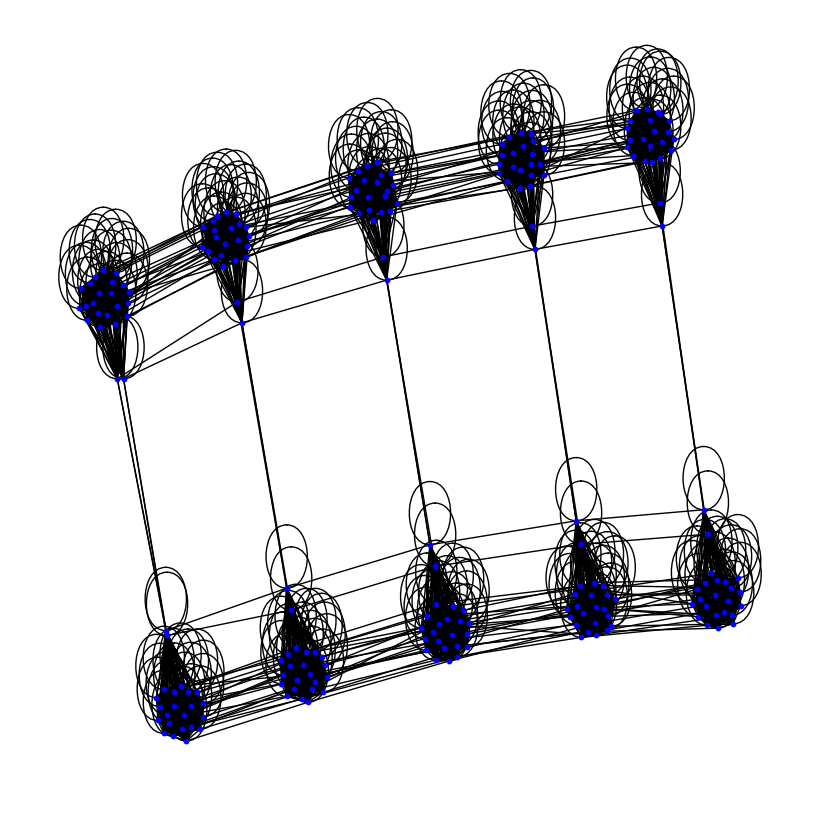

In [75]:
# Plot the graph
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=10, node_color='blue', with_labels=False)
plt.show()


---

In [25]:
import torch
dataset = torch.load(r'c:\Users\jalvarez\Documents\Data\DataLoader_Baseline_models\dataset.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\jalvarez\\Documents\\Data\\DataLoader_Baseline_models\\dataset.pkl'

In [104]:
y = []
for data in dataset:
    y.append(data.behaviour)    

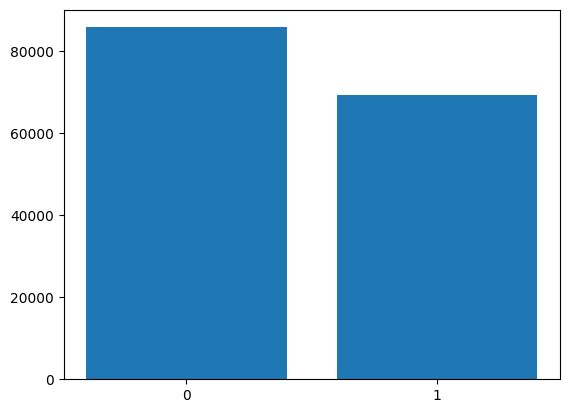

In [105]:
# Class balance

import numpy as np
import matplotlib.pyplot as plt

y = np.array(y)
unique, counts = np.unique(y, return_counts=True)

plt.bar(unique, counts)
plt.xticks(unique)
plt.show()


In [106]:
print(' The percentage of the most frequent class is: ', counts.max()/counts.sum())

 The percentage of the most frequent class is:  0.5529856426000697


# Baseline Network implemented from scratch

In [70]:
from torch_geometric.data import Data, DataLoader

In [107]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# Load the data
dataset = torch.load(r'c:\Users\jalvarez\Documents\Data\DataLoader_Baseline_models\dataset_full_edges_w5.pkl', map_location=device)

# Suffle the dataset
np.random.seed(0)
np.random.shuffle(dataset)


cpu


In [110]:
dataset[0].behaviour

tensor([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [111]:
for i in range(len(dataset)):
    dataset[i].behaviour = dataset[i].behaviour[0]


In [112]:

# Split train and test
train_size = int(0.8 * len(dataset))

train_dataset = dataset[:train_size]
test_dataset = dataset[train_size:]

print('The train dataset has %d samples' % len(train_dataset))
print('The test dataset has %d samples' % len(test_dataset))



The train dataset has 124033 samples
The test dataset has 31009 samples


In [113]:
batch_size = 16

# Create the dataloaders for train, validation and test
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

c:\Users\jalvarez\AppData\Local\anaconda3\envs\projenv\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [114]:
import models

In [115]:
train_dataset[0].behaviour

tensor(1)

In [116]:
model.to(device)

print('The model has %d trainable parameters' % sum(p.numel() for p in model.parameters() if p.requires_grad))


The model has 24802 trainable parameters


In [140]:
import torch.optim as optim
import torch.nn as nn
import time

import tqdm
import importlib

In [143]:
importlib.reload(models)

<module 'models' from 'c:\\Users\\jalvarez\\Documents\\Code\\GitHubCOde\\Behavioral_Tagging_of_Mice_in_multiple_Mice_dataset_using_Deep_Learning\\src\\models.py'>

In [145]:
# Define the model
graphencoder = models.GATEncoder(nout = 8, nhid=16, attention_hidden=2, n_in=4, dropout=0.5)
class_head = models.ClassificationHead(n_latent=576, nhid = 64, nout = 2)


In [146]:
for batch in train_loader:
    data = batch.to(device)
    break


In [147]:
embbed = graphencoder(data.x, data.edge_index, data.batch)

In [148]:
embbed.shape

torch.Size([2880, 16])

In [149]:
def concatenate_per_graph(embbed, batch, frame_mask):
    ''' Concatenate the embeddings per graph '''
    out = []
    for i in range(batch.max()+1):
        out.append(embbed[batch==i][frame_mask[batch==i] == frame_mask[batch==i].median()].flatten())
    return torch.stack(out)

In [150]:
hidden = concatenate_per_graph(embbed, data.batch, data.frame_mask)


In [151]:
hidden.shape

torch.Size([16, 576])

In [128]:
out = class_head(hidden)

In [129]:
out.shape

torch.Size([16, 2])

In [131]:
model = models.GraphClassifier(graphencoder, class_head)

In [132]:
# Training loop
num_epochs = 50
lr = 0.001
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()
#writer = SummaryWriter(log_dir='runs/MLP_baseline_graph_adapted')  # TensorBoard writer

start_time = time.time()  # Time the training
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    correct = 0
    total = 0
    i = 0

    for data in tqdm.tqdm(train_loader):
        optimizer.zero_grad()
       
        outputs = model(data)
        labels = data.behaviour

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        predicted = outputs.argmax(dim=1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

        # Log training loss and accuracy at each step
        if i % 100 == 0:  # Log every 100 iterations, adjust as needed
            print(f"Epoch {epoch + 1}, Iteration {i}, Loss: {loss.item()}")
            print(f"Accuracy: {correct / total}")
            #writer.add_scalar('Loss/Train', loss.item(), epoch * len(train_loader) + i)
            #writer.add_scalar('Accuracy/Train', correct / total, epoch * len(train_loader) + i)
        i += 1
    train_accuracy = correct / total
    avg_train_loss = train_loss / len(train_loader)
    print(f"Epoch {epoch + 1}, Training Loss: {avg_train_loss}, Training Accuracy: {train_accuracy}")

    # Validation phase
    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for val_data in tqdm.tqdm(test_loader):
            val_outputs = model(val_data)
            val_labels = val_data.behaviour[0]
            val_loss += criterion(val_outputs, val_labels).item()
            val_predicted = val_outputs.argmax(dim=1)
            correct += (val_predicted == val_labels).sum().item()
            total += val_labels.size(0)

    val_accuracy = correct / total
    avg_val_loss = val_loss / len(test_loader)

    print(f"Validation Loss: {avg_val_loss}, Validation Accuracy: {val_accuracy}")

    # Log validation metrics
    #writer.add_scalar('Loss/Validation', avg_val_loss, epoch)
    #writer.add_scalar('Accuracy/Validation', val_accuracy, epoch)

    # Save checkpoint after each 5 epochs
    # if (epoch + 1) % 5 == 0:
    #     checkpoint_path = os.path.join(checkpoint_dir, f'checkpoint_epoch_{epoch + 1}.pth')
    #     save_checkpoint(model, optimizer, epoch + 1, avg_train_loss, checkpoint_path)

# Save the final model
#if num_epochs % 5 != 0:
#checkpoint_path = os.path.join(checkpoint_dir, f'checkpoint_epoch_{epoch + 1}.pth')
#save_checkpoint(model, optimizer, epoch + 1, avg_train_loss, checkpoint_path)

# Time the training
end_time = time.time()
print(f"Training took {end_time - start_time} seconds, for {num_epochs} epochs")
# Close the TensorBoard writer
#writer.close()

print("Training finished")

  0%|          | 2/7753 [00:00<25:30,  5.06it/s]

Epoch 1, Iteration 0, Loss: 0.6937247514724731
Accuracy: 0.4375


  1%|          | 86/7753 [00:15<22:51,  5.59it/s]


KeyboardInterrupt: 